In [1]:
#Import necessary libraries
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [2]:
#Inputs from user
name_of_file = str(input("Enter the file name(should be in the same directory) "))
lambda_value = float(input("Enter the value of Lambda "))
delta_value = float(input("Enter the value of Delta "))
epsilon_value = float(input("Enter the value of Epsilon "))
M = int(input("Enter the number of Classes "))
D = int(input("Enter the number of Features(Dimension of dataset) "))
start_idx = int(input("Enter the Starting Index of the Class "))
comma_sep = str(input("Is Comma Seperated[Y/N] "))

Enter the file name(should be in the same directory) Image3.txt
Enter the value of Lambda 0.8
Enter the value of Delta 0.01
Enter the value of Epsilon 0.8
Enter the number of Classes 2
Enter the number of Features(Dimension of dataset) 2
Enter the Starting Index of the Class 1
Is Comma Seperated[Y/N] Y


In [3]:
# N --> Number of Samples
# M --> Number of Classes
# D --> Number of Features or Dimension
# I am using 2D dimension here. So set the value of M = 2. N is also known. And D = 2.

if comma_sep == 'Y':
    whole_training_set = np.genfromtxt(name_of_file, delimiter=',',dtype=None, encoding=None)
else:
    whole_training_set = np.genfromtxt(name_of_file)
N = len(whole_training_set)  ##Is this really needed?

In [4]:
mod_Cm = [0 for i in range(M)]
if start_idx == 0:
    k = [element for element in range(M)]  
elif start_idx == 1:
    k = [element for element in range(1,M+1)]
class_n_datapoints = [[] * 1 for i in range(M)]
branch_one_list = []
for i in range(len(whole_training_set)):
    branch_one_list.append([whole_training_set[i][-1]])
branch_one = np.array(branch_one_list)
branch_two_list = []
for i in range(len(whole_training_set)):
    branch_two_list.append([whole_training_set[i][0],whole_training_set[i][1]])
branch_two = np.array(branch_two_list)


#Function to get the centroid of a dataset;
#Generalized to give centroid of any dimensional dataset 
def centeroidpython(data):
    centroid = 0
    start = 0
    cen_array = [] ##list containing the centroid values 
    for i in range(data.shape[1]):
        centroid = sum(data[:, start:i+1])/data.shape[0]
        start += 1
        cen_array.append(centroid)
    #print(cen_array)
    return cen_array

#To get the number of elements in each class along with the elements in each class;
#Generalized to give elements and number of elements of any dimensional dataset 
for i in range(len(branch_one)):
    pos = 0 
    if start_idx == 0:
        while pos < M: 
            if branch_one[i] == k[pos]:
                mod_Cm[pos] += 1
                class_n_datapoints[pos].append(branch_two[i])
                break
            else:
                pos += 1
                
    elif start_idx == 1:
        while pos+1 < M+1: 
            if branch_one[i] == k[pos]:
                mod_Cm[pos] += 1
                class_n_datapoints[pos].append(branch_two[i])
                break
            else:
                pos += 1


print("|Cm| = ",mod_Cm)
#print(len(class_n_datapoints))
            
            

cm = [] ##Initializing the small cm, the centroid list
for i in range(len(class_n_datapoints)):
    cm.append(centeroidpython(np.array(class_n_datapoints[i])))
print("cm = ",cm)

|Cm| =  [5000, 5000]
cm =  [[array([1.02022509]), array([3.01124179])], [array([12.9809423]), array([3.00182278])]]


In [5]:
T = [None for m in range(M)] #Used to store the minimum number of samples to be present in each class
i = 0

for m in range(M):
    T[m] = (1 - epsilon_value) * mod_Cm[m]
print("Threshold =",T)

Threshold = [999.9999999999998, 999.9999999999998]


In [6]:
#Following algorithm detects the best instances by delecting the points inside the Reduction Sphere
#Generalized to give results on any dimensional dataset

import time
time1 = time.time()

#i = 0 ##Should I use 0 or 1?
best_instances = [[] * 1 for i in range(M)]

#Using my method slightly
pos = 0
for m in range(M):
    Num = 0
    i = 0  ##Should I use 0 or 1?
    print("m =",m)
    
    
    while mod_Cm[m] - Num > T[m]:  ## Strictly greater than used, as given in paper
        i += 1
        best_instances[pos] = []
        dist = []
        dist_sum = 0
        for j in range(len(class_n_datapoints[m])):
            dist.append(distance.euclidean(cm[m], class_n_datapoints[m][j]))
            dist_sum = sum(dist)
        first_part = (lambda_value + (delta_value * i))/mod_Cm[m]
        Rm = first_part * dist_sum  ##Radius whose value changes with iteration
        print("Radius =",Rm)

        for j in range(len(class_n_datapoints[m])):
            if mod_Cm[m] - Num > T[m] and (distance.euclidean(cm[m], class_n_datapoints[m][j])) >= Rm: ##Made it greater than equal to
                best_instances[pos].append(class_n_datapoints[m][j])
                Num += 1
                
        print("mod_Cm[m] - Num =",(mod_Cm[m] - Num),"T[m] =",T[m])
    
    pos += 1

    
elapsed1 = time.time() - time1
print("Time taken =",elapsed1, " sec")

m = 0
Radius = 1.717305775644421
mod_Cm[m] - Num = 2220 T[m] = 999.9999999999998
Radius = 1.7385070815165744
mod_Cm[m] - Num = 999 T[m] = 999.9999999999998
m = 1
Radius = 1.711039444763396
mod_Cm[m] - Num = 2179 T[m] = 999.9999999999998
Radius = 1.7321633885259071
mod_Cm[m] - Num = 999 T[m] = 999.9999999999998
Time taken = 2.220639944076538  sec


In [7]:
for i in range(len(best_instances)):
    print(len(best_instances[i]))

1221
1180


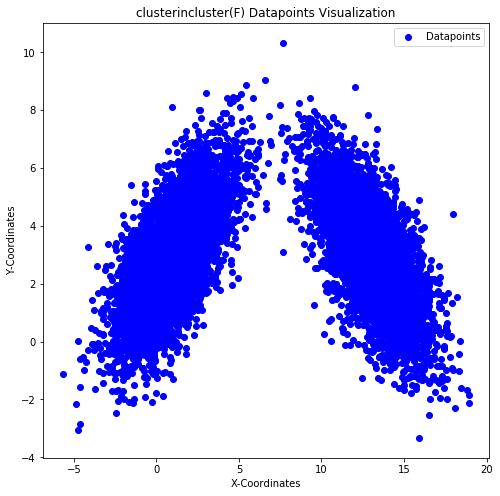

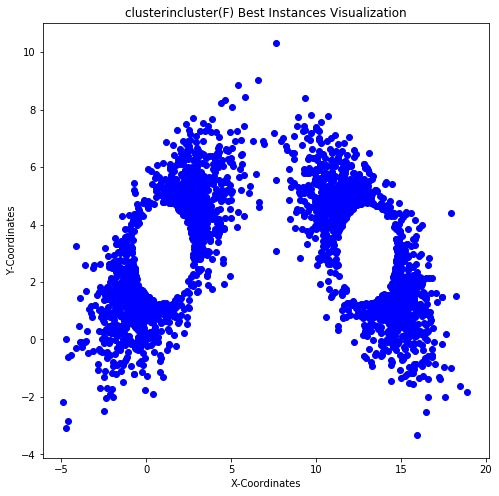

In [8]:
if D == 2:
    plt.figure(figsize=(8,8))
    plt.scatter(branch_two[:,0],branch_two[:,1],c='blue', label='Datapoints')
    plt.xlabel('X-Coordinates')
    plt.ylabel('Y-Coordinates')
    plt.title('clusterincluster(F) Datapoints Visualization')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(8,8))
    for i in range(len(best_instances)):
        best_instances_array = np.array(best_instances[i])
        plt.scatter(best_instances_array[:,0],best_instances_array[:,1],c='blue')
    plt.xlabel('X-Coordinates')
    plt.ylabel('Y-Coordinates')
    plt.title('clusterincluster(F) Best Instances Visualization')
    #plt.legend()
    plt.show()

else:
    print("Higher Dimension cannot be displayed!!")

Agglomerative Clustering Results Comparison

In [9]:
clustering = AgglomerativeClustering().fit(branch_two)
ac2 = AgglomerativeClustering(n_clusters = M) 
array = ac2.fit_predict(branch_two)
k1 = [element for element in range(M)]

class_n = [[] * 1 for i in range(M)] 

for i in range(len(array)):
    pos = 0
    while pos < M:
        if array[i] == k1[pos]:
            class_n[pos].append(branch_two[i])
            break
        else:
            pos += 1

def centeroidpython(data):
    centroid = 0
    start = 0
    cen_array = [] ##list containing the centroid values 
    for i in range(data.shape[1]):
        centroid = sum(data[:, start:i+1])/data.shape[0]
        start += 1
        cen_array.append(centroid)
    #print(cen_array)
    return cen_array

cen_n_one = []
for i in range(len(class_n)):
    cen_n_one.append(centeroidpython(np.array(class_n[i])))
#print(cen_n_one)

In [10]:
if D != 2:
    for i in range(len(best_instances)):
        best_instances_array = np.array(best_instances[i])       
clustering = AgglomerativeClustering().fit(best_instances_array)
ac2 = AgglomerativeClustering(n_clusters = M) 
array = ac2.fit_predict(best_instances_array)
k1 = [element for element in range(M)]

class_n = [[] * 1 for i in range(M)]

for i in range(len(array)):
    pos = 0
    while pos < M: 
        if array[i] == k1[pos]:
            class_n[pos].append(best_instances_array[i])
            break
        else:
            pos += 1

def centeroidpython(data):
    centroid = 0
    start = 0
    cen_array = [] ##list containing the centroid values 
    for i in range(data.shape[1]):
        centroid = sum(data[:, start:i+1])/data.shape[0]
        start += 1
        cen_array.append(centroid)
    #print(cen_array)
    return cen_array

cen_n_two = []
for i in range(len(class_n)):
    cen_n_two.append(centeroidpython(np.array(class_n[i])))
#print(cen_n_two)

In [11]:
print(cen_n_one)
print(cen_n_two)

[[array([12.98326427]), array([3.00000668])], [array([1.02268735]), array([3.01305267])]]
[[array([14.83205164]), array([1.17754599])], [array([11.21719583]), array([4.90937078])]]


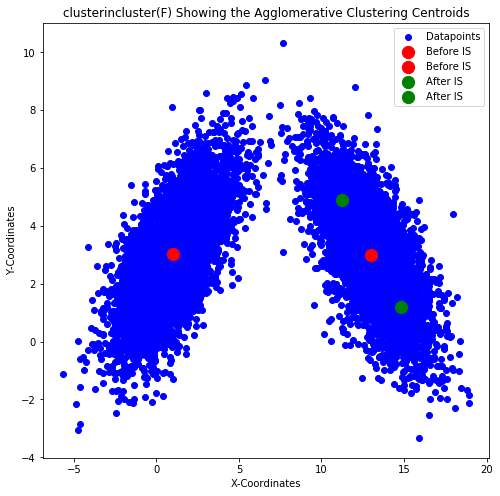

In [12]:
if D == 2:
    plt.figure(figsize=(8,8))
    plt.scatter(branch_two[:,0],branch_two[:,1],c='blue', label='Datapoints')
    for i in range(len(cen_n_one)):
            cen_n_one_array = np.array(cen_n_one[i])
            plt.scatter(cen_n_one[i][0],cen_n_one[i][1],s=150,c='red',label="Before IS")
    for i in range(len(cen_n_two)):
            plt.scatter(cen_n_two[i][0],cen_n_two[i][1],s=150,c='green',label="After IS")
    plt.xlabel('X-Coordinates')
    plt.ylabel('Y-Coordinates')
    plt.title('clusterincluster(F) Showing the Agglomerative Clustering Centroids')
    plt.legend()
    plt.show()
else:
    print("Higher Dimension cannot be displayed!!")

In [13]:
diff_centroids = []
for i in range(len(cen_n_one)):
    dis = 0
    dis = distance.euclidean(cen_n_one[i],cen_n_two[i])
    diff_centroids.append(dis)
print("The Difference between the Centroids are =",diff_centroids)  ##The required Result

The Difference between the Centroids are = [2.5960311475416873, 10.369379220828431]
